In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
from sklearn.datasets import load_boston

In [29]:
data = load_boston()

In [30]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [31]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [32]:
df = pd.DataFrame(data.data,columns = data.feature_names)

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
df['target'] = data.target

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
df = df[['CRIM','RM','LSTAT','target']]

In [37]:
df.head()

,CRIM,RM,LSTAT,target
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2


In [38]:
df.describe()

,CRIM,RM,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063,22.532806
std,8.601545,0.702617,7.141062,9.197104
min,0.006320,3.561000,1.730000,5.000000
25%,0.082045,5.885500,6.950000,17.025000
50%,0.256510,6.208500,11.360000,21.200000
75%,3.677083,6.623500,16.955000,25.000000
max,88.976200,8.780000,37.970000,50.000000


In [42]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train.shape , X_test.shape

((339, 3), (167, 3))

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [48]:
sc.fit(X_train)

StandardScaler()

In [49]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [50]:
sc.mean_  # scalar stores mean of each features

array([ 3.35132407,  6.32732448, 12.49761062])

In [51]:
sc.scale_  # scalar stores std of each features

array([7.67831051, 0.71965617, 7.1704303 ])

In [52]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [53]:
X_train_scaled.head()

,CRIM,RM,LSTAT
0,0.896249,-0.197767,0.771556
1,-0.348959,-0.714681,0.322490
2,-0.417641,-0.215832,0.927753
3,-0.421968,-0.478457,0.118876
4,-0.419793,0.203813,-0.031743


In [54]:
X_train_scaled.describe()

,CRIM,RM,LSTAT
count,3.390000e+02,3.390000e+02,3.390000e+02
mean,1.833997e-17,1.030559e-15,-3.184932e-16
std,1.001478e+00,1.001478e+00,1.001478e+00
min,-4.352864e-01,-3.424308e+00,-1.501669e+00
25%,-4.257739e-01,-6.076853e-01,-7.834412e-01
50%,-4.027154e-01,-1.366270e-01,-2.130431e-01
75%,6.035303e-03,5.254947e-01,5.456283e-01
max,1.115153e+01,3.408121e+00,3.552421e+00


In [59]:
# normal data

np.round(X_train.describe())

,CRIM,RM,LSTAT
count,339.0,339.0,339.0
mean,3.0,6.0,12.0
std,8.0,1.0,7.0
min,0.0,4.0,2.0
25%,0.0,6.0,7.0
50%,0.0,6.0,11.0
75%,3.0,7.0,16.0
max,89.0,9.0,38.0


In [60]:
np.round(X_train_scaled.describe())

,CRIM,RM,LSTAT
count,339.0,339.0,339.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-0.0,-3.0,-2.0
25%,-0.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0
75%,0.0,1.0,1.0
max,11.0,3.0,4.0


In [61]:
np.round(X_test.describe())

,CRIM,RM,LSTAT
count,167.0,167.0,167.0
mean,4.0,6.0,13.0
std,10.0,1.0,7.0
min,0.0,4.0,3.0
25%,0.0,6.0,7.0
50%,0.0,6.0,12.0
75%,4.0,6.0,17.0
max,74.0,9.0,37.0


In [62]:
np.round(X_test_scaled.describe())

,CRIM,RM,LSTAT
count,167.0,167.0,167.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-0.0,-4.0,-1.0
25%,-0.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0
75%,0.0,0.0,1.0
max,9.0,3.0,3.0


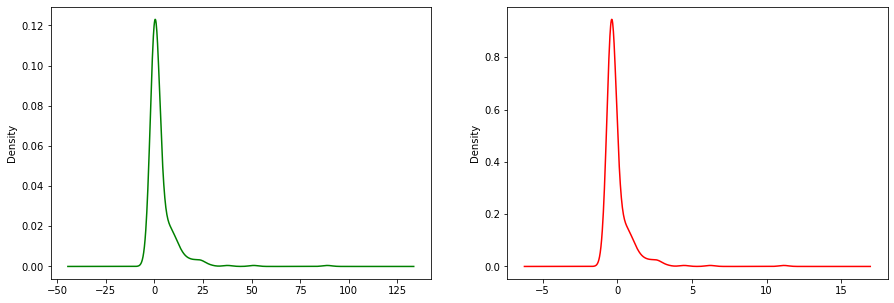

In [69]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
X_train['CRIM'].plot(kind = 'kde',color = 'g',label = 'before scaling')
plt.subplot(1,2,2)
X_train_scaled['CRIM'].plot(kind = 'kde',color = 'r',label = 'before scaling')
plt.show()

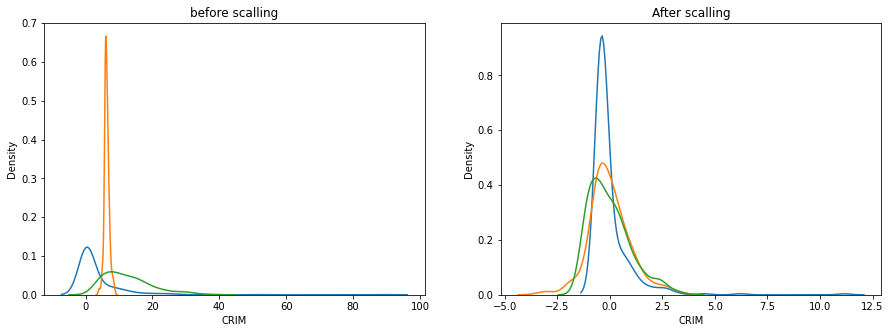

In [74]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("before scalling")
sns.kdeplot(X_train['CRIM'],ax = ax1)
sns.kdeplot(X_train['RM'],ax = ax1)
sns.kdeplot(X_train['LSTAT'],ax = ax1)

ax2.set_title("After scalling")
sns.kdeplot(X_train_scaled['CRIM'],ax = ax2)
sns.kdeplot(X_train_scaled['RM'],ax = ax2)
sns.kdeplot(X_train_scaled['LSTAT'],ax = ax2)




plt.show()